In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [3]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.750,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.525,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.250,NaN,Q,16,NaN,NaN


# 2. Analysing Data

## 2.1. Overview

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   object 
 4   age        812 non-null    float64
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1008 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [5]:
np.unique(train['pclass'],return_counts=True)

(array([1., 2., 3.]), array([247, 217, 545], dtype=int64))

In [6]:
np.unique(train['sex'],return_counts=True)

(array(['female', 'male'], dtype=object), array([361, 648], dtype=int64))

In [7]:
np.unique(train['sibsp'],return_counts=True)

(array([0., 1., 2., 3., 4., 5., 8.]),
 array([676, 255,  30,  17,  19,   4,   8], dtype=int64))

In [8]:
np.unique(train['parch'],return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 9.]),
 array([766, 139,  84,   7,   5,   4,   2,   2], dtype=int64))

In [9]:
train['ticket']

0                364856
1                250655
2                 31418
3                363291
4                367226
             ...       
1004             112277
1005               4135
1006              35273
1007               2651
1008    SOTON/OQ 392090
Name: ticket, Length: 1009, dtype: object

In [10]:
train['fare'].describe()

count    1008.000000
mean       33.647412
std        51.452123
min         0.000000
25%         7.895800
50%        14.458300
75%        31.387500
max       512.329200
Name: fare, dtype: float64

In [11]:
train[train['cabin'].notna()]['cabin']

7        D17
8        B10
15      C128
16       C68
20      C101
        ... 
993      D19
999      C99
1002     E33
1004     A31
1006     D36
Name: cabin, Length: 229, dtype: object

In [12]:
np.unique(train[train['cabin'].notna()]['cabin'],return_counts=True)

(array(['A14', 'A16', 'A18', 'A19', 'A20', 'A21', 'A23', 'A24', 'A26',
        'A29', 'A31', 'A34', 'A5', 'A9', 'B10', 'B102', 'B18', 'B19',
        'B22', 'B24', 'B26', 'B28', 'B3', 'B30', 'B35', 'B36', 'B37',
        'B38', 'B41', 'B42', 'B45', 'B49', 'B5', 'B50', 'B51 B53 B55',
        'B52 B54 B56', 'B57 B59 B63 B66', 'B58 B60', 'B61', 'B69', 'B71',
        'B73', 'B77', 'B78', 'B79', 'B82 B84', 'B96 B98', 'C101', 'C103',
        'C106', 'C110', 'C111', 'C116', 'C118', 'C123', 'C124', 'C125',
        'C126', 'C128', 'C130', 'C132', 'C148', 'C2', 'C22 C26',
        'C23 C25 C27', 'C28', 'C31', 'C32', 'C45', 'C46', 'C47', 'C49',
        'C50', 'C51', 'C52', 'C54', 'C55 C57', 'C6', 'C62 C64', 'C65',
        'C68', 'C7', 'C78', 'C80', 'C82', 'C85', 'C86', 'C87', 'C89',
        'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12', 'D11',
        'D15', 'D17', 'D19', 'D20', 'D21', 'D22', 'D26', 'D28', 'D30',
        'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D40', 'D46', 'D48',
     

In [13]:
train['embarked'].unique()

array(['Q', 'S', 'C', nan], dtype=object)

In [14]:
train['boat'].unique()

array([nan, '9', 'C D', '16', '8', '13', '14', '4', '2', 'B', '12', '15',
       '1', '5 9', 'C', '10', '5', '3', '7', '11', 'D', '6', 'A', '13 15',
       '5 7', '13 15 B'], dtype=object)

In [15]:
train['body'].unique()

array([ nan, 208.,  61., 130.,  43., 175., 314., 287., 269., 249.,  89.,
       155., 124., 122., 133., 230.,  14.,  79.,  51., 234., 181., 236.,
       173., 171., 169., 286., 292.,  52., 328., 165.,  18.,  37., 294.,
       172., 293.,  67.,  15., 149.,  53., 327., 166.,  72.,  68., 245.,
       306., 206.,  69., 263., 201., 119.,  19., 284.,  50.,   7., 153.,
         1., 207.,  97., 135., 298., 147., 174., 131., 190., 101., 259.,
       283.,  58., 187., 299.,  45.,   4., 156., 309., 258., 126., 188.,
       285.,  80., 305.,  17., 255.,  62., 261.,  32., 143., 256., 232.,
        38., 176.,  96., 121., 297., 148., 304.,  81., 275.,  70., 260.])

In [16]:
train['home.dest'].unique()

array([nan, 'Strood, Kent, England Detroit, MI',
       'Liverpool / Montreal, PQ', 'Ilfracombe, Devon', 'New York, NY',
       'Omaha, NE', 'West Hampstead, London / Neepawa, MB',
       'St Ives, Cornwall / Hancock, MI', 'London, England',
       'Haverford, PA', 'Hessle, Yorks',
       'Berne, Switzerland / Central City, IA', 'Spain', 'Bronx, NY',
       'Washington, DC', 'Rotherfield, Sussex, England Essex Co, MA',
       'Ireland', 'Dorchester, MA', 'Lima, Peru', 'Cornwall / Akron, OH',
       'Lyndhurst, England', 'Oskarshamn, Sweden Minneapolis, MN',
       'London  Vancouver, BC', 'London',
       'Bristol, Avon / Jacksonville, FL', 'Zurich, Switzerland',
       'Ruotsinphytaa, Finland New York, NY',
       'New York, NY / Greenwich CT', 'Glasgow', 'Milwaukee, WI',
       'Ireland Chicago, IL', 'Deephaven, MN / Cedar Rapids, IA',
       'Bridgerule, Devon', 'Sweden Joliet, IL', 'East Bridgewater, MA',
       'Cooperstown, NY', 'Oslo, Norway Cameron, WI',
       'Mt Airy, Philad

### Data Dictionary
- pclass: Passenger Class
- survived: label 0 or 1 for died or survived 
- name: Name of passenger
- sex: Female or Male
- age: Age of passenger
- sibsp: No of siblings of passenger
- parch: No of family members of passenger
- ticket: Ticket details
- fare: fare of ticket
- cabin: cabin details
- embarked: Port from where the passenger embarked
- boat: indicates Lifeboat Number if Passenger was rescued
- body: indicates body number of dead passenger, if it was retrieved
- home.dest: Home destination of passenger

## 2.2. Data Visualization

### ~pclass

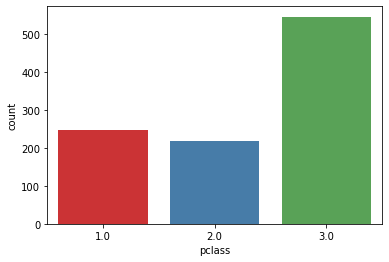

In [17]:
sns.countplot(x=train['pclass'],palette='Set1')
plt.show()

In [18]:
# Most passengers are of class 3

### Analysing survival rates for each class

In [19]:
survived=[]
total=[]
pclass_labels=[1,2,3]
for x in pclass_labels:
    s=np.sum([train[train['survived']==1]['pclass']==x])
    survived.append(s)
    t=np.sum([train['pclass']==x])
    total.append(t)
    
survived=np.array(survived)
total=np.array(total)

In [20]:
print(survived)
print(total)

[156  87 139]
[247 217 545]


<BarContainer object of 3 artists>

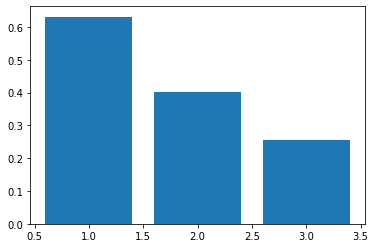

In [21]:
plt.bar(x=[1,2,3],height=survived/total)

### Highest Survival Rate in class 1
- Class 1>2>3

### ~ Sex

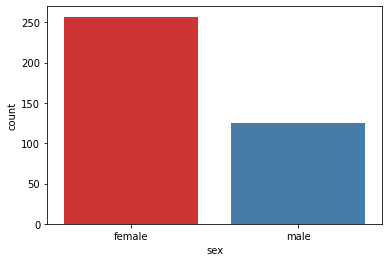

In [22]:
sns.countplot(x=train[train['survived']==1]['sex'],palette='Set1')
plt.show()

### Greater number of females survived as compared to males

### ~Age

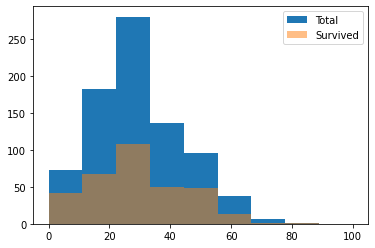

In [23]:
x_age=train['age']
y_age=train[train['survived']==1]['age']

bins = np.linspace(0, 100, 10)

plt.hist(x_age, bins, label='Total')
plt.hist(y_age, bins, alpha=0.5, label='Survived')
plt.legend()
plt.show()

In [24]:
## Passengers with age <=16 have greater survival rates
# Introduce a column called isMinor

## ~Fare

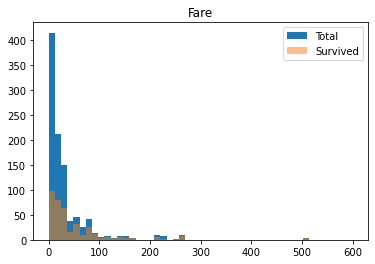

In [25]:
x_fare=train['fare']
y_fare=train[train['survived']==1]['fare']

bins = np.linspace(0, 600, 50)
plt.title('Fare')
plt.hist(x_fare, bins, label='Total')
plt.hist(y_fare, bins, alpha=0.5, label='Survived')
plt.legend()
plt.show()

In [26]:
## Abstract Results

## ~Sibsp and Parch

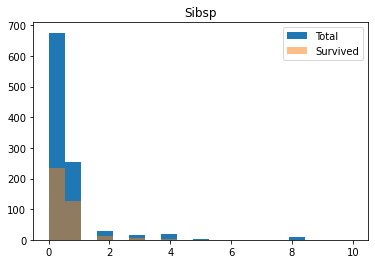

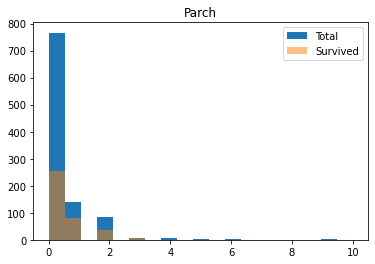

In [27]:
x_sibsp=train['sibsp']
y_sibsp=train[train['survived']==1]['sibsp']

bins = np.linspace(0, 10, 20)
plt.title('Sibsp')
plt.hist(x_sibsp, bins, label='Total')
plt.hist(y_sibsp, bins, alpha=0.5, label='Survived')
plt.legend()
plt.show()


x_parch=train['parch']
y_parch=train[train['survived']==1]['parch']

bins = np.linspace(0, 10, 20)
plt.title('Parch')
plt.hist(x_parch, bins, label='Total')
plt.hist(y_parch, bins, alpha=0.5, label='Survived')
plt.legend()
plt.show()




In [28]:
# Combine sibsp and parch into one feature

## ~Embarked

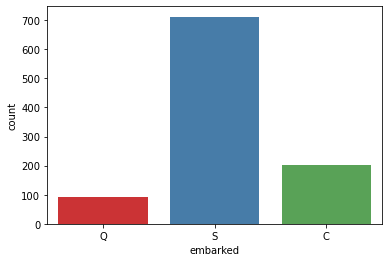

In [29]:
sns.countplot(x=train['embarked'],palette='Set1')
plt.show()

In [30]:
## Highest number of passengers embarked from S

### Analysing Survival Rates for embarked ports

In [31]:
em_survived=[]
em_total=[]
em_labels=['S','Q','C']
for x in em_labels:
    s=np.sum([train[train['survived']==1]['embarked']==x])
    em_survived.append(s)
    t=np.sum([train['embarked']==x])
    em_total.append(t)
    
em_survived=np.array(em_survived)
em_total=np.array(em_total)

In [32]:
print(em_survived)
print(em_total)

[234  30 117]
[712  93 203]


<BarContainer object of 3 artists>

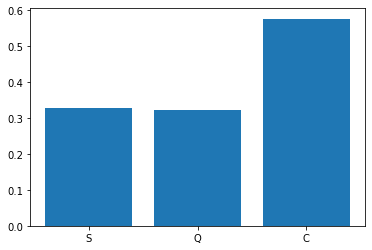

In [33]:
plt.bar(x=em_labels,height=em_survived/em_total)

In [34]:
# Highest Survival Rate in port C

## Summary:
- Most passengers are of class 3
- Survival Rates Class 1>2>3
- Greater number of females survived as compared to males
- Passengers with age <=16 have greater survival rates, therefore, Introduce a column called isMinor
- Combine sibsp and parch into one feature
- Highest number of passengers embarked from S
- Highest Survival Rate in port C

# 3. Initial Feature Engineering 
- Retain columns as it is: pclass, sex, age, embarked, boat, body
- Columns to be dropped: name, ticket, cabin, fare, home.dest
- Modify these columns: merge sibsp and parch, introduce isMinor

## 3.1 Filling in Missing Values

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   object 
 4   age        812 non-null    float64
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1008 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [36]:
# Missing Values in columns: age, embarked, boat, body

In [37]:
# Age
tr_median=train['age'].median()
ts_median=test['age'].median()

train['age'].fillna(tr_median,inplace=True)
test['age'].fillna(ts_median,inplace=True)

In [38]:
#Embarked
train['embarked'].fillna('S',inplace=True)
test['embarked'].fillna('S',inplace=True)

In [39]:
# Boat
train['boat'].fillna(0,inplace=True)
test['boat'].fillna(0,inplace=True)

In [40]:
#Body
train['body'].fillna(0,inplace=True)
test['body'].fillna(0,inplace=True)

## 3.2 Encoding Sex and Embarked Cols

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#Sex
train['sex']=le.fit_transform(train['sex'])
test['sex']=le.fit_transform(test['sex'])

#Embarked
train['embarked']=le.fit_transform(train['embarked'])
test['embarked']=le.fit_transform(test['embarked'])

## 3.3 Modifying Values and Columns

In [42]:
# Merge sibsp and parch
train['sibsp_parch']=train['sibsp']+train['parch']
test['sibsp_parch']=test['sibsp']+test['parch']

In [43]:
# Adding isMinor
train['isMinor']=np.where(train['age']<16,1,0)
test['isMinor']=np.where(test['age']<16,1,0)

In [44]:
columns_drop=['name','ticket','fare','home.dest','sibsp','parch','cabin']

In [45]:
train=train.drop(columns=columns_drop)

In [46]:
test=test.drop(columns=columns_drop)

In [47]:
train.head(20)

,pclass,survived,sex,age,embarked,boat,body,sibsp_parch,isMinor
0,3.0,0.0,0,28.0,1,0,0.0,0.0,0
1,2.0,0.0,1,39.0,2,0,0.0,0.0,0
2,2.0,1.0,0,40.0,2,9,0.0,0.0,0
3,3.0,1.0,0,31.0,2,C D,0.0,2.0,0
4,3.0,1.0,0,28.0,1,16,0.0,2.0,0
5,2.0,0.0,1,16.0,2,0,0.0,0.0,0
6,2.0,0.0,1,43.0,2,0,0.0,1.0,0
7,1.0,1.0,0,49.0,2,8,0.0,0.0,0
8,1.0,0.0,1,48.0,0,0,208.0,0.0,0
9,2.0,0.0,1,28.0,2,0,0.0,0.0,0


In [48]:
boat=train[train['boat']!=0]
boat.head(10)

,pclass,survived,sex,age,embarked,boat,body,sibsp_parch,isMinor
2,2.0,1.0,0,40.0,2,9,0.0,0.0,0
3,3.0,1.0,0,31.0,2,C D,0.0,2.0,0
4,3.0,1.0,0,28.0,1,16,0.0,2.0,0
7,1.0,1.0,0,49.0,2,8,0.0,0.0,0
11,3.0,1.0,0,28.0,1,13,0.0,0.0,0
12,2.0,1.0,0,48.0,2,14,0.0,2.0,0
13,2.0,1.0,1,8.0,2,14,0.0,2.0,1
16,1.0,1.0,0,39.0,0,4,0.0,2.0,0
20,1.0,1.0,0,55.0,2,2,0.0,2.0,0
21,1.0,1.0,1,80.0,2,B,0.0,0.0,0


In [49]:
boat.shape

(374, 9)

In [50]:
boat_die=boat[boat['survived']==0]
boat_die.head(10)

,pclass,survived,sex,age,embarked,boat,body,sibsp_parch,isMinor
158,3.0,0.0,1,25.0,2,B,0.0,0.0,0
212,3.0,0.0,1,32.0,2,D,0.0,1.0,0
257,1.0,0.0,1,36.0,0,A,0.0,0.0,0
381,3.0,0.0,1,27.0,0,C,0.0,1.0,0
467,3.0,0.0,1,28.0,2,A,0.0,0.0,0
520,3.0,0.0,0,30.0,2,A,0.0,1.0,0
979,3.0,0.0,1,36.0,2,A,0.0,1.0,0


In [51]:
#Mostly people with boats survived
# encoding boat value as 1 for people who had boats

train['boat']=np.where(train['boat']!=0,1,0)
test['boat']=np.where(test['boat']!=0,1,0)

In [52]:
body=train[train['body']!=0]
body.head()

,pclass,survived,sex,age,embarked,boat,body,sibsp_parch,isMinor
8,1.0,0.0,1,48.0,0,0,208.0,0.0,0
17,3.0,0.0,0,30.5,1,0,61.0,0.0,0
25,2.0,0.0,1,52.0,2,0,130.0,0.0,0
33,2.0,0.0,1,32.5,0,0,43.0,1.0,0
34,1.0,0.0,1,54.0,2,0,175.0,0.0,0


In [53]:
body_alive=body[body['survived']==1]
body_alive.head()

,pclass,survived,sex,age,embarked,boat,body,sibsp_parch,isMinor


In [54]:
# All people with body value have died

In [55]:
# encoding body value as 1 for people with body values !=0

train['body']=np.where(train['body']!=0,1,0)
test['body']=np.where(test['body']!=0,1,0)

# 4. Creating training matrices

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1009 non-null   float64
 1   survived     1009 non-null   float64
 2   sex          1009 non-null   int32  
 3   age          1009 non-null   float64
 4   embarked     1009 non-null   int32  
 5   boat         1009 non-null   int32  
 6   body         1009 non-null   int32  
 7   sibsp_parch  1009 non-null   float64
 8   isMinor      1009 non-null   int32  
dtypes: float64(4), int32(5)
memory usage: 51.4 KB


In [57]:
input_cols=['pclass','sex','age','embarked','boat','body','sibsp_parch','isMinor']
X=train[input_cols]
Y=train['survived']

In [58]:
Xtest=test[input_cols]

# 5. Classification

Models to try
- XGBOOST Classifier
- Gradient Boosting Classifier
- Random Forests

## 4.1. XGBOOST Classifier

In [59]:
import xgboost as xgb

In [60]:
xgbClf=xgb.XGBClassifier(max_depth=4,learning_rate=0.01,
                         booster='gbtree',n_estimators=100)

In [61]:
xgbClf.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
xgbClf.score(X,Y)

0.9781962338949455

In [63]:
#Prone to Overfitting

## 4.2. Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gbc=GradientBoostingClassifier(n_estimators=100,max_depth=5)

In [66]:
gbc.fit(X,Y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [67]:
gbc.score(X,Y)

0.9920713577799801

In [68]:
#Prone to Overfitting

## 4.3. Random Forests Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf=RandomForestClassifier(n_estimators=100,criterion='gini')

In [71]:
rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
rf.score(X,Y)

0.9920713577799801

## 4.4 Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr=LogisticRegression(solver='newton-cg')

In [75]:
lr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
lr.score(X,Y)

0.9781962338949455

# 6. Testing

In [77]:
y_xgb=xgbClf.predict(Xtest)
y_gbc=gbc.predict(Xtest)
y_rf=rf.predict(Xtest)
y_lr=lr.predict(Xtest)

In [78]:
print(y_xgb.shape)
print(y_gbc.shape)
print(y_rf.shape)
print(y_lr.shape)

(300,)
(300,)
(300,)
(300,)


In [79]:
print(np.sum(y_xgb))
print(np.sum(y_gbc))
print(np.sum(y_rf))
print(np.sum(y_lr))

112.0
114.0
113.0
112.0


In [80]:
i=np.arange(0,300)

In [81]:
Yxgb=pd.DataFrame({'ID':i,'survived':y_xgb})
Ygbc=pd.DataFrame({'ID':i,'survived':y_gbc})
Yrf=pd.DataFrame({'ID':i,'survived':y_rf})
Ylr=pd.DataFrame({'ID':i,'survived':y_lr})

In [82]:
Yxgb.to_csv('YXGB.csv',index=False)
Ygbc.to_csv('YGBC.csv',index=False)
Yrf.to_csv('YRF.csv',index=False)
Ylr.to_csv('YLR.csv',index=False)

In [83]:
# XGBOOST- 96% 
# Gradient Boosting- 96%
# Random Forest- 96%
# Logistic Regression- 96%